In [1]:
#! /usr/bin/env python

import sys
from aubio import source, pvoc, mfcc
from numpy import vstack, zeros, diff

In [2]:
n_filters = 40              # must be 40 for mfcc
n_coeffs = 13

# if len(sys.argv) < 2:
#     print("Usage: %s <source_filename> [samplerate] [win_s] [hop_s] [mode]" % sys.argv[0])
#     print("  where [mode] can be 'delta' or 'ddelta' for first and second derivatives")
#     sys.exit(1)

In [22]:
print(sys.argv)


['/Users/willian/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py', '-f', '/Users/willian/Library/Jupyter/runtime/kernel-e650e170-b8e6-4065-8f79-270535398dc0.json']


In [6]:
source_filename = "Data/test.wav"

samplerate = 0
win_s = 512
hop_s = win_s // 4
mode = "default"

In [8]:
s = source(source_filename, samplerate, hop_s)
samplerate = s.samplerate
p = pvoc(win_s, hop_s)
m = mfcc(win_s, n_filters, n_coeffs, samplerate)

mfccs = zeros([n_coeffs,])
frames_read = 0
while True:
    samples, read = s()
    spec = p(samples)
    mfcc_out = m(spec)
    mfccs = vstack((mfccs, mfcc_out))
    frames_read += read
    if read < hop_s: break


In [28]:
# do plotting
from numpy import arange
from demo_waveform_plot import get_waveform_plot
from demo_waveform_plot import set_xlabels_sample2time
import matplotlib.pyplot as plt

fig = plt.figure()
plt.rc('lines',linewidth='.8')
wave = plt.axes([0.1, 0.75, 0.8, 0.19])

get_waveform_plot( source_filename, samplerate, block_size = hop_s, ax = wave)
wave.xaxis.set_visible(False)
wave.yaxis.set_visible(False)

# compute first and second derivatives
if mode in ["delta", "ddelta"]:
    mfccs = diff(mfccs, axis = 0)
if mode == "ddelta":
    mfccs = diff(mfccs, axis = 0)

all_times = arange(mfccs.shape[0]) * hop_s
n_coeffs = mfccs.shape[1]
for i in range(n_coeffs):
    ax = plt.axes ( [0.1, 0.75 - ((i+1) * 0.65 / n_coeffs),  0.8, 0.65 / n_coeffs], sharex = wave )
    ax.xaxis.set_visible(False)
    ax.set_yticks([])
    ax.set_ylabel('%d' % i)
    ax.plot(all_times, mfccs.T[i])

# add time to the last axis
set_xlabels_sample2time( ax, frames_read, samplerate)

#plt.ylabel('spectral descriptor value')
ax.xaxis.set_visible(True)
title = 'MFCC for %s' % source_filename
if mode == "delta": title = mode + " " + title
elif mode == "ddelta": title = "double-delta" + " " + title
wave.set_title(title)


In [29]:
%config InlineBackend.figure_format='retina'
width = 24
height = 24
plt.figure(figsize=(width, height))

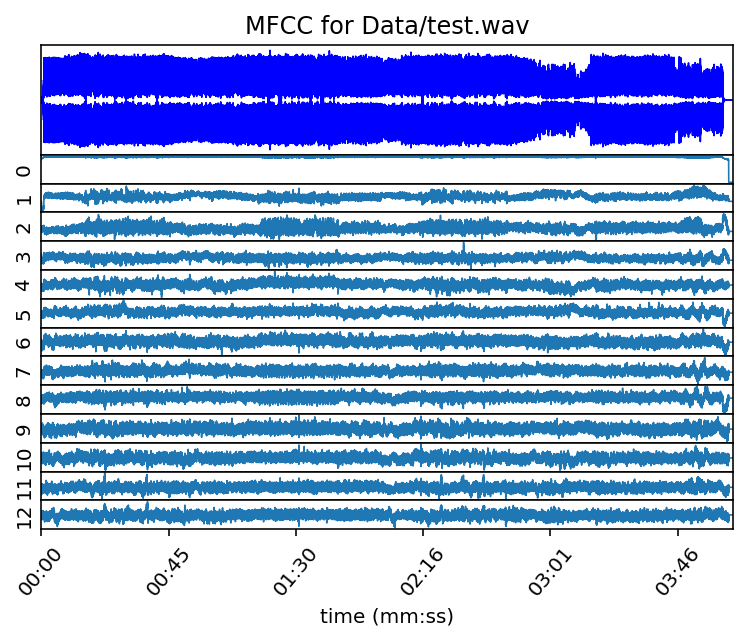

In [30]:
plt.show()